# A PCA example in Octave
## First, we build the data, in our case, a matrix with 200 points in 4D 

In [1]:
M = ones(200, 4);
for i = 1:200
    M(i,1) = i;
    M(i,2) = log(i);
    M(i,3) = rand()*100;
    M(i,4) = log(i*1.5);
endfor

In [2]:
M(1:5,:)

ans =

    1.00000    0.00000   17.18941    0.40547
    2.00000    0.69315   85.25708    1.09861
    3.00000    1.09861   49.77380    1.50408
    4.00000    1.38629   50.51546    1.79176
    5.00000    1.60944   88.45538    2.01490



## Plot our data
With 4 dimensions we will use a 3D scatter plot, codifying color in the additional dimension

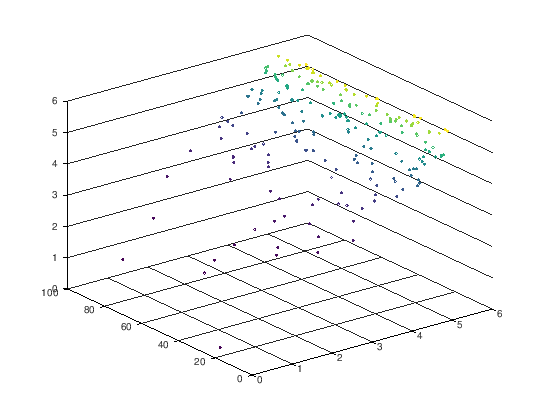

In [3]:
%plot -f png
% We plot a 3D scatter plot with color given by M(:,1)
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

## Plot a series of 1 x 1 scatters
With that we can have a better understanding of how each dimension relate to each other

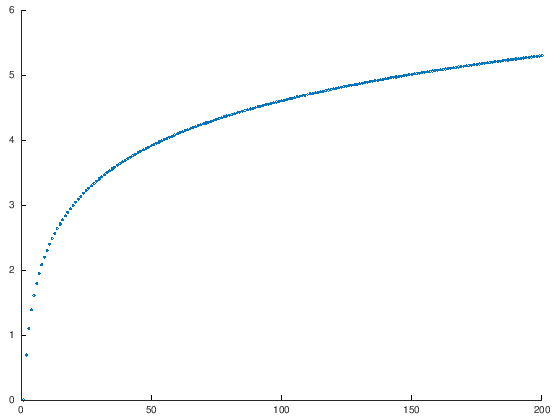

In [4]:
scatter(M(:,1), M(:,2))

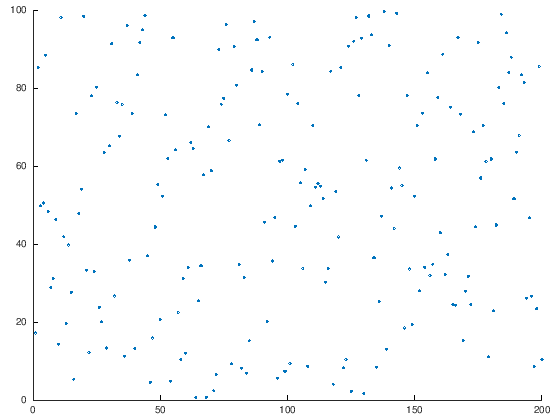

In [5]:
scatter(M(:,1), M(:,3))

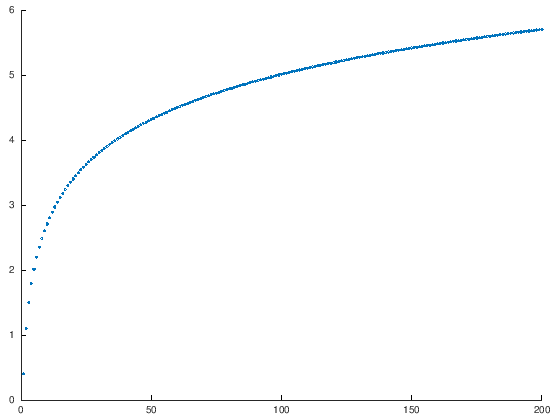

In [6]:
scatter(M(:,1), M(:,4))

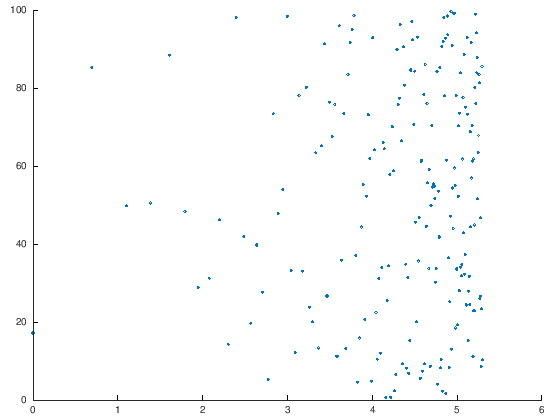

In [7]:
scatter(M(:,2), M(:,3))

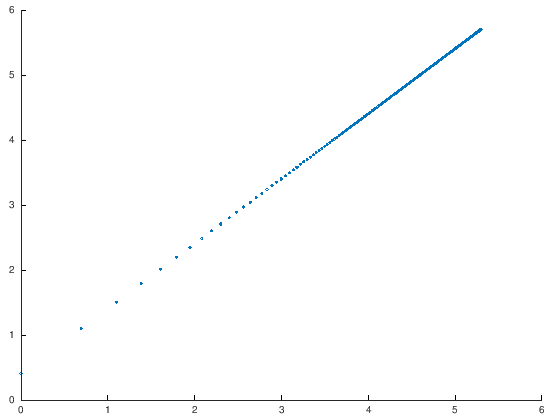

In [8]:
scatter(M(:,2), M(:,4))

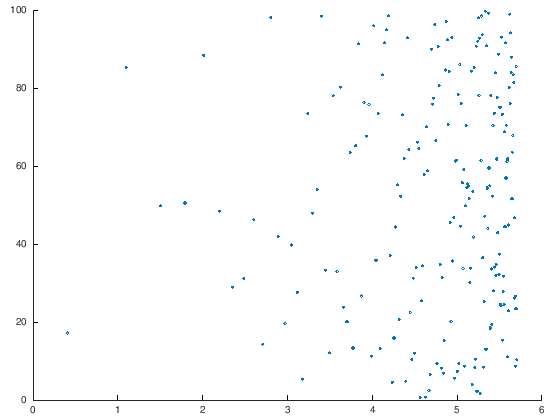

In [9]:
scatter(M(:,4), M(:,3))

## We can also plot a series of 3D scatters
Leaving one dimension out per plot

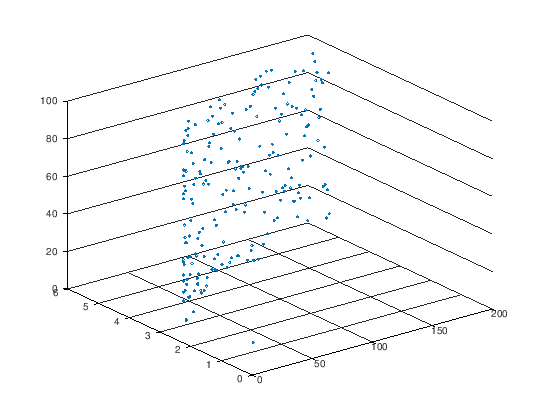

In [10]:
scatter3 (M(:,1), M(:,2), M(:,3))

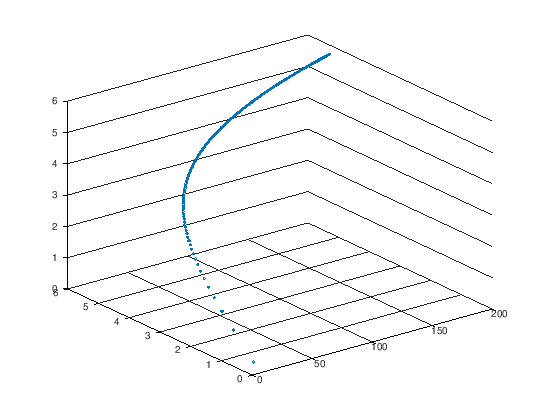

In [11]:
scatter3 (M(:,1), M(:,2), M(:,4))

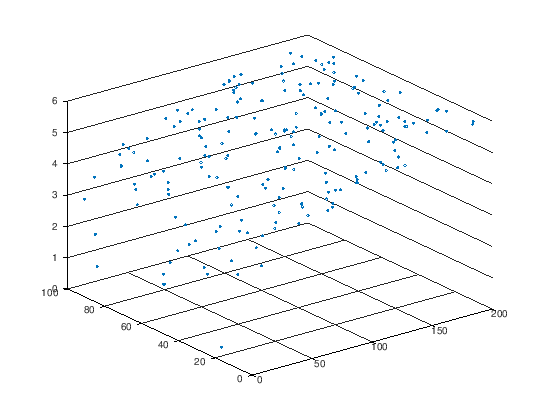

In [12]:
scatter3 (M(:,1), M(:,3), M(:,4))

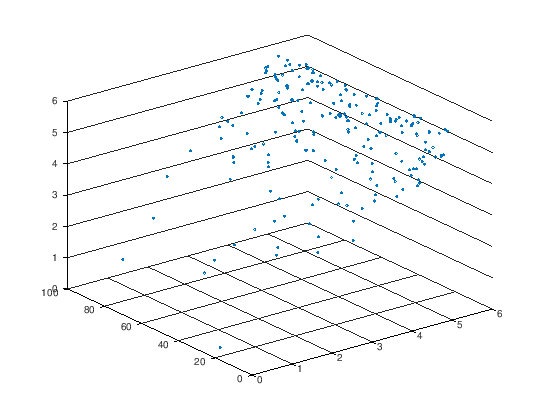

In [13]:
scatter3 (M(:,2), M(:,3), M(:,4))

## Centralize the data

$\rightarrow$ Subtract the mean from the data and plot the result

We could also normalize the data, that's not always necessary, but is a good practice in most Machine Learning applications

In [14]:
M = M - mean(M);
M(1:5,:)

ans =

  -99.50000   -4.31616  -34.00303   -4.31616
  -98.50000   -3.62301   34.06465   -3.62301
  -97.50000   -3.21755   -1.41864   -3.21755
  -96.50000   -2.92987   -0.67697   -2.92987
  -95.50000   -2.70672   37.26294   -2.70672



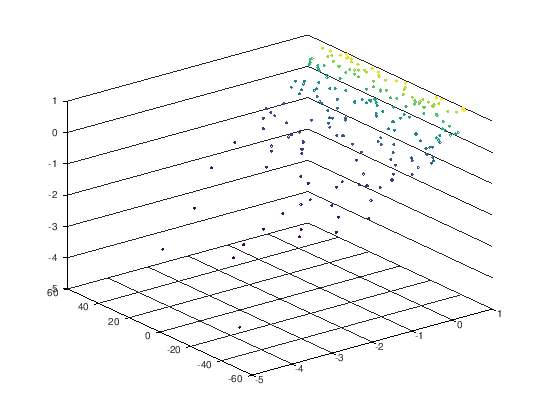

In [15]:
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

## Compute the covariance matrix
$\Sigma = M'M/(sampleSize - 1)$

In [16]:
sigma = (M'*M)/(size(M, 1)-1)

sigma =

   3.3500e+03   4.8955e+01   1.3131e+02   4.8955e+01
   4.8955e+01   9.1102e-01   1.7913e+00   9.1102e-01
   1.3131e+02   1.7913e+00   8.7503e+02   1.7913e+00
   4.8955e+01   9.1102e-01   1.7913e+00   9.1102e-01



## Get the eigenvalues and eigenvectors with SVD
#### By applying the singular value decomposition algorithm to the covariance matrix we get a set of unitary eigenvectors and their eigenvalues
* $U$ is the eigenvector matrix, each column is an eigenvector.
* $S$ is the diagonal eigenvalue matrix, diagonal values correspond to eigenvector scales.

In [17]:
[U, S, V] = svd(sigma)

U =

  -9.9839e-01  -5.2797e-02   2.0673e-02  -5.0698e-15
  -1.4590e-02  -9.1881e-04  -7.0696e-01  -7.0711e-01
  -5.2813e-02   9.9860e-01  -2.0795e-04   2.9965e-16
  -1.4590e-02  -9.1881e-04  -7.0696e-01   7.0711e-01

S =

Diagonal Matrix

   3.3584e+03            0            0            0
            0   8.6809e+02            0            0
            0            0   3.9103e-01            0
            0            0            0   2.0067e-14

V =

  -9.9839e-01  -5.2797e-02   2.0673e-02  -1.0747e-15
  -1.4590e-02  -9.1881e-04  -7.0696e-01  -7.0711e-01
  -5.2813e-02   9.9860e-01  -2.0795e-04   4.5245e-17
  -1.4590e-02  -9.1881e-04  -7.0696e-01   7.0711e-01



## Transform the data and plot
* $PCA = M\times U$

Note that the 4 dimensions do not have the same meaning here, as the whole data was tranformed (translated, compressed, rotated).

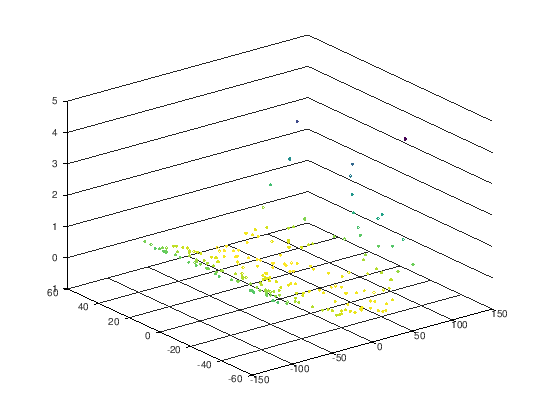

In [18]:
PCA = M*U;
scatter3(PCA(:,1), PCA(:,2), PCA(:,3), [], PCA(:,4))

## Restore our data
- $M$ is our original data
- $PCA = M\times U$
- $U$ is unitary $\rightarrow U\times U^{T} = U^{T}\times U = I$
- $\rightarrow PCA \times U^{T} = M \times U \times U^{T} = M \times I = M$

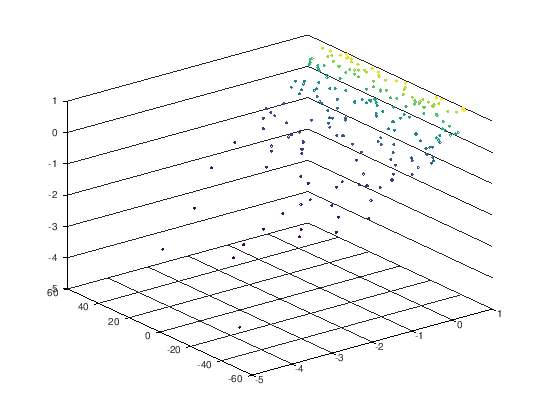

In [19]:
Mr = PCA*U';
scatter3(Mr(:,2), Mr(:,3), Mr(:,4), [], Mr(:,1))

## As precision is limited, there is a small error after the computations.

In [20]:
mean(abs(M-Mr))

ans =

   5.2125e-15   9.8055e-15   1.4079e-14   4.3692e-16



## With PCA you can also reduce the data dimensions
* $PCAr = M \times U_{k}$ where $U_{k}$ are the first $k$ columns of $U$

For the first example we will reduce the original data from $4\rightarrow 2$ dimensions

In [21]:
PCAr=M*U(:,1:2);
size(PCAr)

ans =

   200     2



## *Recover* the data
To original data is not properly recovered, as the information for some dimensions were lost on the first transformation.
* $M$ is our original data
* $PCA = M\times U_k \rightarrow M_k = PCA \times U^{T}_k = M\times U_k \times U^{T}_k$

In [22]:
Mk = PCAr*U(:,1:2)';

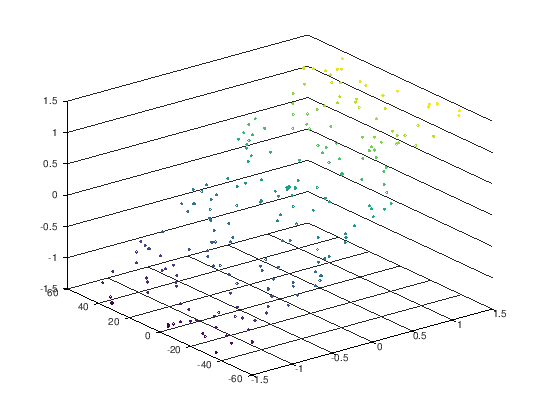

In [23]:
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## But now, error is not negligible

In [24]:
mean(abs(M-Mk))

ans =

   8.8904e-03   3.0403e-01   8.9429e-05   3.0403e-01



## What about $4\rightarrow 3\rightarrow 4$ dimensions?
Discarding just one dimension and restoring it back does not produce a big error, in our case.
* Why is that?
  * Hints
    * Take a look at S (from the SVD decomposition)
    * Take a look at how the matrix was built
    * Take a look at the scatter plots

ans =

   200     3

ans =

   5.2661e-15   7.4302e-14   1.4015e-14   7.4661e-14



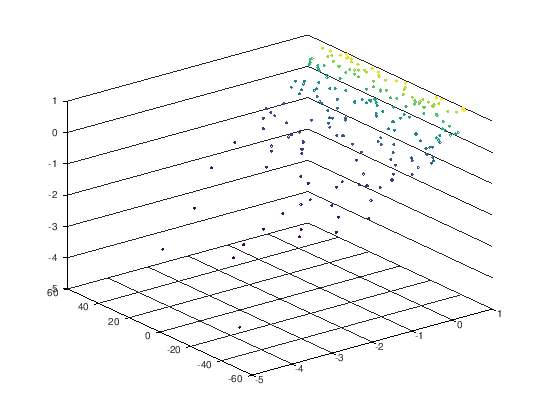

In [25]:
PCAr=M*U(:,1:3);
size(PCAr)
Mk = PCAr*U(:,1:3)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## What happens if we discard and then restore 3 dimensions?

ans =

   200     1

ans =

    1.34909    0.30376   25.51495    0.30376



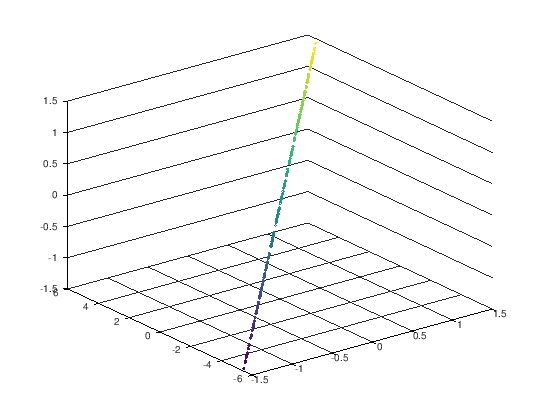

In [26]:
PCAr=M*U(:,1);
size(PCAr)
Mk = PCAr*U(:,1)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))